# Data Exploration for trip.csv

In [56]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df_trip = pd.read_csv('../data/trip.csv')

In [4]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


### Now that we have the data properly loaded, we will try to explore the data we have.

In [5]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


#### Figuring out the null values

In [6]:
df_trip.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

### Exploring the 'trips' dataframe

In [7]:
df_trip.shape

(669959, 11)

In [8]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


Text(0.5, 1.0, 'Distribution of Subscription Type')

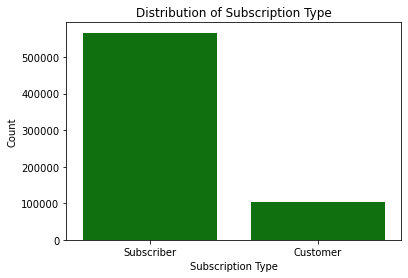

In [73]:
# Plot the distribution of subscription type
sb.countplot(data = df_trip, x = 'subscription_type', color = 'g')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title('Distribution of Subscription Type')


Text(0.5, 1.0, 'Distribution of Start Station Name')

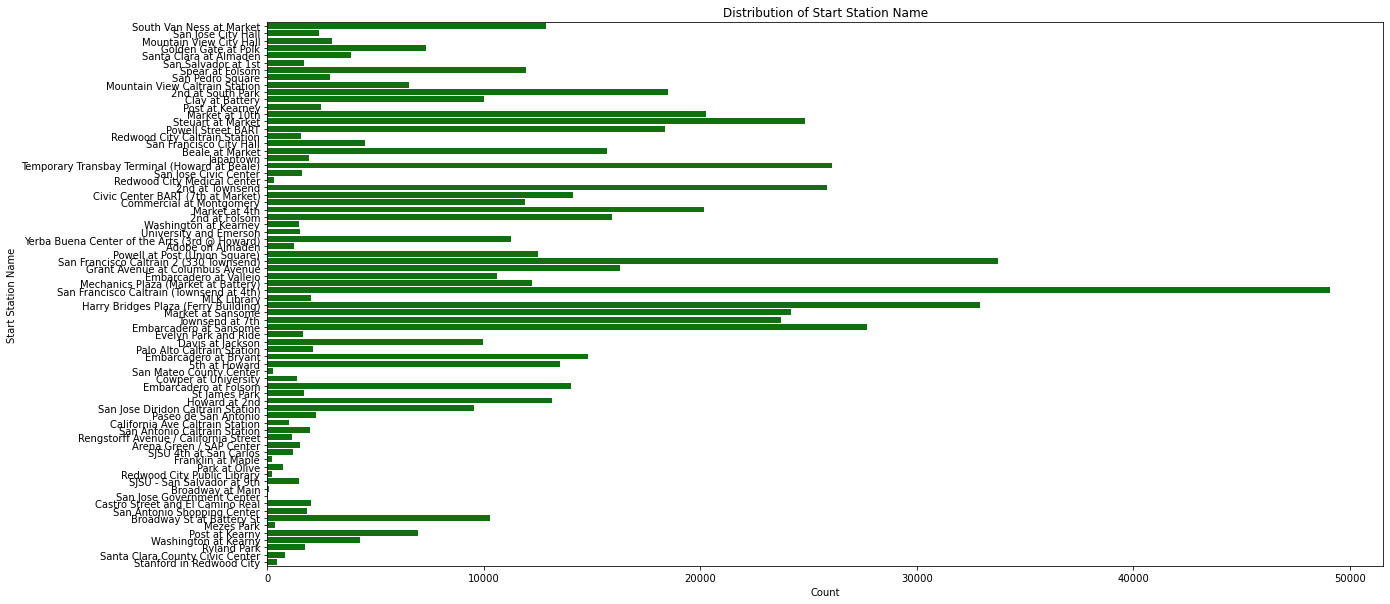

In [74]:
# Plot the distribution of start_station_name
plt.figure(figsize = [20, 10])
sb.countplot(data = df_trip, y = 'start_station_name', color = 'g')
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Distribution of Start Station Name')
    

In [ ]:
# 

In [9]:
# Count the null values in df_trip
df_trip.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [10]:
# Descrribe duration for trip
df_trip.duration.describe()

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

##### I think that the data is in minutes judging by the scale. We can convert into seconds. It might be more workable if the duration is in seconds.

In [11]:
df_trip.duration /= 60

In [12]:
# Descrribe duration for trip
df_trip.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

Minimum is 1 second. Max seems to be huge. Above we can see that there are some values that seem to be outside the normal range. 

## From here itself, we can determine the longest trip and shortest trip

Shortest Trip: 1 second <br>
Longest Trip: 287840 seconds (or 79.9555555 hours)

In [13]:
df_trip['duration'].quantile(0.995)

343.9201666666661

In [14]:
df_trip = df_trip[df_trip.duration <= 350]

In [15]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [16]:
df_trip.shape

(666730, 11)

In [17]:
# Convert to datetime
df_trip.start_date = pd.to_datetime(df_trip.start_date, format='%m/%d/%Y %H:%M')

In [18]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [19]:
# Convert to datetime and adding to our df_trip
df_trip['date'] = df_trip.start_date.dt.date

In [20]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29


In [21]:
# Create a dict for each unique date in df_trip['date'] and the number of trips on that date
trip_count = dict(df_trip['date'].value_counts())

#print(trip_count)

In [22]:
# Create the dataframe using the trip_count dict
df_trip_count = pd.DataFrame.from_dict(trip_count, orient='index').reset_index()
df_trip_count.head()

,index,0
0,2014-08-26,1509
1,2014-09-15,1505
2,2014-10-14,1495
3,2014-10-29,1494
4,2014-08-27,1472


In [23]:
# Naming the columns
df_trip_count.columns = ['date', 'trip_count']

In [24]:
df_trip_count.head(10)

,date,trip_count
0,2014-08-26,1509
1,2014-09-15,1505
2,2014-10-14,1495
3,2014-10-29,1494
4,2014-08-27,1472
5,2015-08-26,1464
6,2014-10-16,1458
7,2015-07-28,1449
8,2014-10-02,1448
9,2015-08-27,1439


#### With this, we can figure out how many trips were taken on a particular date.

In [25]:
# Sort the df_trip_count by date
df_trip_count = df_trip_count.sort_values(by='date')

In [26]:
df_trip_count.head()

,date,trip_count
471,2013-08-29,742
477,2013-08-30,699
486,2013-08-31,628
481,2013-09-01,683
484,2013-09-02,652


In [27]:
# Rename df_trip_count to df_train_main
df_train_main = df_trip_count


In [28]:
df_train_main.shape

(733, 2)

In [29]:
df_train_main.reset_index(drop = True, inplace = True)

In [30]:
df_train_main.head(20)

,date,trip_count
0,2013-08-29,742
1,2013-08-30,699
2,2013-08-31,628
3,2013-09-01,683
4,2013-09-02,652
5,2013-09-03,592
6,2013-09-04,599
7,2013-09-05,671
8,2013-09-06,810
9,2013-09-07,786


In [31]:
# Count the values in df_train_main
df_train_main.trip_count.value_counts()

1295    5
392     5
1222    4
1300    4
1357    4
       ..
468     1
1494    1
1495    1
476     1
1025    1
Name: trip_count, Length: 506, dtype: int64

In [32]:
# Count the unique values of column date in df_train_main
df_train_main.date.nunique()

733

In [33]:
# Write df_train_main to csv
df_train_main.to_csv('../data/train_main.csv', index=False)

<Figure size 1584x1152 with 0 Axes>

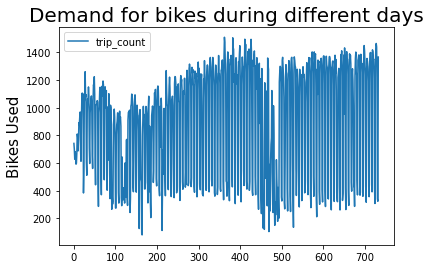

In [55]:
plt.figure(figsize = (20, 15))
df_train_main.plot()
plt.title('Demand')
plt.ylabel('Trips')
plt.xlabel('Date')
plt.show()

In [64]:
new_df = df_train_main['trip_count']


In [65]:
new_df.head()

0    742
1    699
2    628
3    683
4    652
Name: trip_count, dtype: int64

In [67]:
new_df.index = df_train_main['date']

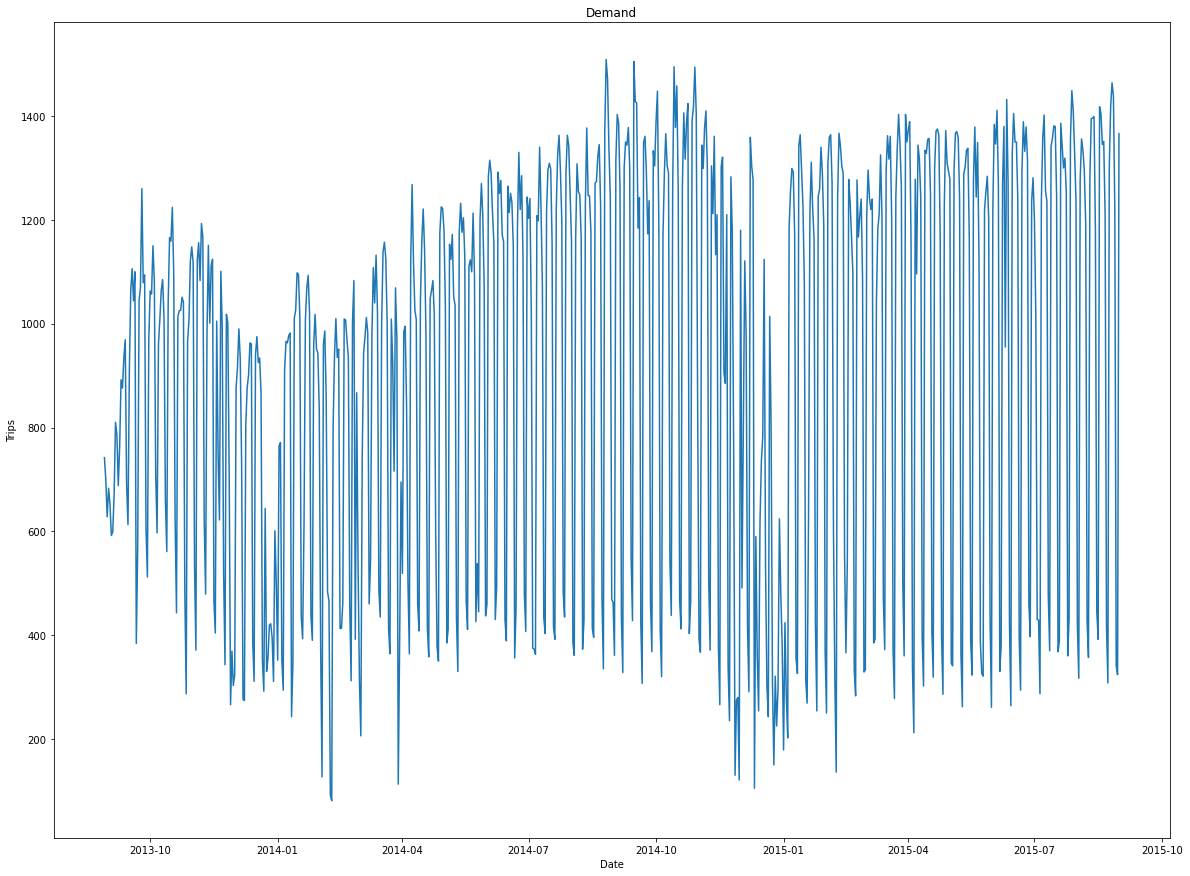

In [68]:
plt.figure(figsize = (20, 15))
new_df.plot()
plt.title('Demand')
plt.ylabel('Trips')
plt.xlabel('Date')
plt.show()

Text(0, 0.5, 'Trips')

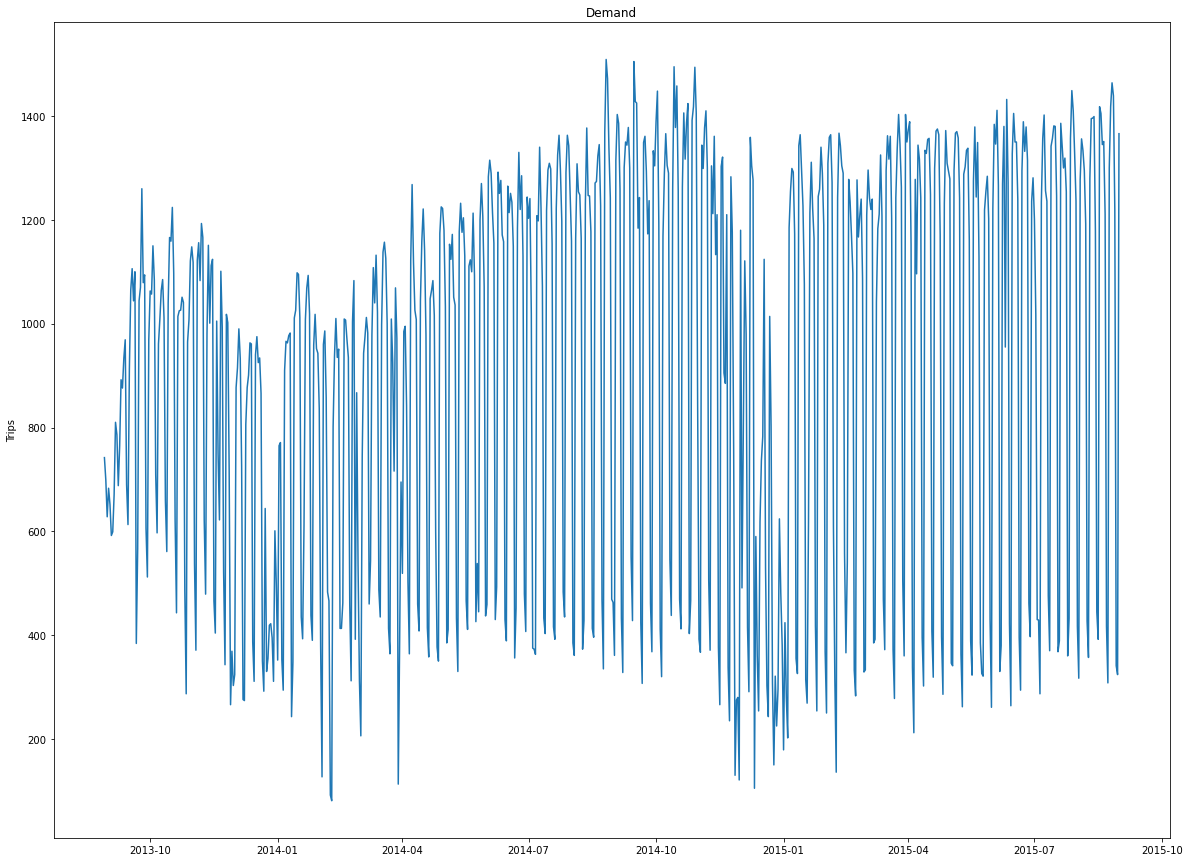

In [69]:
# Create a time step graph for df_train_main
plt.figure(figsize = (20, 15))
plt.plot(df_train_main['date'], df_train_main['trip_count'])
plt.title('Demand')
plt.ylabel('Trips')

##### We can use this data above for demand prediction. 

In [34]:
# Show the uniuqe elements for the zip_code column
df_trip.zip_code.unique()

array(['94127', '95138', '97214', ..., '2280', '9240', '29609'],
      dtype=object)

In [35]:
# Get the distrubution of the zip_code column
df_trip.zip_code.value_counts()

94107    78568
94105    42613
94133    31311
94103    26613
94111    21380
         ...  
25403        1
33025        1
3514         1
68480        1
99708        1
Name: zip_code, Length: 7226, dtype: int64

In [36]:
# Count unique values for the zip_code column
df_trip.zip_code.nunique()

7226

In [37]:
# For each unique zip_code, get the count of null values for each column
df_trip.groupby('zip_code').apply(lambda x: x.isnull().sum())


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
zip_code,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9999,0,0,0,0,0,0,0,0,0,0,0,0
99999,0,0,0,0,0,0,0,0,0,0,0,0
M4S1P,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Prepare a list of all unique zip_codes
zip_codes = df_trip.zip_code.unique()


##### What do the zip codes mean?

* One inference could be that the zip codes are for the subscribers?


#### Observations:

* Here we see that some of the zip codes are not correct and are garbage values. We need to remove these entries. This will act as a data cleaning. 



In [39]:
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29


#### Now, we also need to predicet the trips for individual stations. So we work on extracting data for that

In [40]:
# Count the unique values for the start_station_name column
df_trip.start_station_name.nunique()

74

In [47]:
df_station_trips = df_trip


In [53]:
df_station_trips.shape

(669959, 11)

In [51]:
# sort all data w.r.t to start_station_name 
df_station_trips = df_station_trips.sort_values(by='start_station_name')
# df_station_trips.groupby('start_station_name')


In [52]:
df_station_trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
577646,562705,101,12/1/2014 17:34,2nd at Folsom,62,12/1/2014 17:35,Howard at 2nd,63,535,Subscriber,94107
183938,377520,191,7/24/2014 5:59,2nd at Folsom,62,7/24/2014 6:02,Market at Sansome,77,352,Subscriber,94107
495049,676440,379,3/10/2015 23:08,2nd at Folsom,62,3/10/2015 23:14,San Francisco Caltrain 2 (330 Townsend),69,534,Subscriber,94107
460203,723875,1233,4/13/2015 20:54,2nd at Folsom,62,4/13/2015 21:14,San Francisco Caltrain (Townsend at 4th),70,687,Customer,19350
460190,723889,282,4/13/2015 21:44,2nd at Folsom,62,4/13/2015 21:48,Market at 4th,76,364,Subscriber,94107


In [54]:
# Get the count for each start_station_id entrties
df_station_trips.start_station_id.value_counts()

70    49092
69    33742
50    32934
60    27713
55    26089
      ...  
83      341
26      311
23      287
21      224
24      213
Name: start_station_id, Length: 70, dtype: int64